In [1]:
#import libs
import pandas as pd
import seaborn as sns

#Enable inline plots
%matplotlib inline

#List the files in the work folder
from subprocess import check_output
print(check_output(["ls", "../work"]).decode("utf8"))

Business Finances.ipynb
IBNK1117.CSV
Marvel Comics Data.ipynb
marvel-wikia-data.csv
Test.ipynb
Untitled.ipynb



In [2]:
pd.options.display.float_format = '{:.0f}'.format
df = pd.read_csv('../work/marvel-wikia-data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16376 entries, 0 to 16375
Data columns (total 13 columns):
page_id             16376 non-null int64
name                16376 non-null object
urlslug             16376 non-null object
ID                  12606 non-null object
ALIGN               13564 non-null object
EYE                 6609 non-null object
HAIR                12112 non-null object
SEX                 15522 non-null object
GSM                 90 non-null object
ALIVE               16373 non-null object
APPEARANCES         15280 non-null float64
FIRST APPEARANCE    15561 non-null object
Year                15561 non-null float64
dtypes: float64(2), int64(1), object(10)
memory usage: 1.6+ MB


In [4]:
df.head()

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
0,1678,Spider-Man (Peter Parker),\/Spider-Man_(Peter_Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,NaN,Living Characters,4043,Aug-62,1962
1,7139,Captain America (Steven Rogers),\/Captain_America_(Steven_Rogers),Public Identity,Good Characters,Blue Eyes,White Hair,Male Characters,NaN,Living Characters,3360,Mar-41,1941
2,64786,"Wolverine (James \""Logan\"" Howlett)",\/Wolverine_(James_%22Logan%22_Howlett),Public Identity,Neutral Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3061,Oct-74,1974
3,1868,"Iron Man (Anthony \""Tony\"" Stark)",\/Iron_Man_(Anthony_%22Tony%22_Stark),Public Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2961,Mar-63,1963
4,2460,Thor (Thor Odinson),\/Thor_(Thor_Odinson),No Dual Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,NaN,Living Characters,2258,Nov-50,1950


In [5]:
df.describe()

,page_id,APPEARANCES,Year
count,16376,15280,15561
mean,300232,17,1985
std,253460,96,20
min,1025,1,1939
25%,28310,1,1974
50%,282578,3,1990
75%,509077,8,2000
max,755278,4043,2013


In [6]:
df = df.drop(['GSM','urlslug', 'page_id', 'EYE', 'HAIR'], axis=1)
df.head()

,name,ID,ALIGN,SEX,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
0,Spider-Man (Peter Parker),Secret Identity,Good Characters,Male Characters,Living Characters,4043,Aug-62,1962
1,Captain America (Steven Rogers),Public Identity,Good Characters,Male Characters,Living Characters,3360,Mar-41,1941
2,"Wolverine (James \""Logan\"" Howlett)",Public Identity,Neutral Characters,Male Characters,Living Characters,3061,Oct-74,1974
3,"Iron Man (Anthony \""Tony\"" Stark)",Public Identity,Good Characters,Male Characters,Living Characters,2961,Mar-63,1963
4,Thor (Thor Odinson),No Dual Identity,Good Characters,Male Characters,Living Characters,2258,Nov-50,1950


In [13]:
df.ALIVE.unique()

array(['Living Characters', 'Deceased Characters', nan], dtype=object)

In [ ]:
df['ALIVE'].replace

In [7]:
newdf = df.sort_values(by=['APPEARANCES'], ascending=False).head(10)

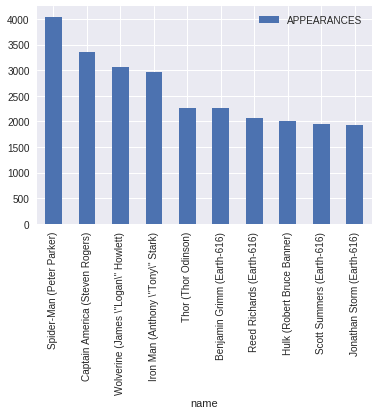

In [8]:
newdf.plot(kind='bar', x='name', y='APPEARANCES')

In [9]:
#Get the year with most and least new Marvel characters introduced respectively, return a (max_year, min_year) tuple. Expect min/max to be pretty far apart.

new = df.groupby(df['Year'])['name'].count().reset_index()
minNewChars = new.sort_values(by=['name']).head(1)['Year'].iloc[0]
maxNewChars = new.sort_values(by=['name']).tail(1)['Year'].iloc[0]
newChars = (maxNewChars, minNewChars)
newChars

(1993.0, 1958.0)

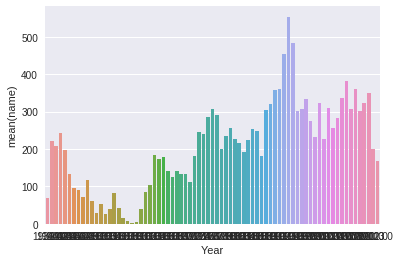

In [10]:
#Plot bar graph of character introductions per year
sns.barplot(x='Year', y='name', data=new)

In [11]:
#What percentage of the comics characters is female? Please give us the percentage rounded to 2 digits.

sex = df.groupby(by=df['SEX'])['name'].count().reset_index(name='count')
sex['percent'] = sex['count'] / sex['count'].sum() * 100
sex['percent'] = sex['percent'].round(2)
sex = sex.set_index('SEX')
percentagefemale = sex.at['Female Characters', 'percent']
print('Percentage of female characters', percentagefemale, '%')

Percentage of female characters 24.72 %


In [12]:
goodvbad = df.groupby(by=['ALIGN', 'SEX'])['name'].count().reset_index(name='count')
goodvbad

,ALIGN,SEX,count
0,Bad Characters,Agender Characters,20
1,Bad Characters,Female Characters,976
2,Bad Characters,Male Characters,5338
3,Good Characters,Agender Characters,10
4,Good Characters,Female Characters,1537
5,Good Characters,Genderfluid Characters,1
6,Good Characters,Male Characters,2966
7,Neutral Characters,Agender Characters,13
8,Neutral Characters,Female Characters,640
9,Neutral Characters,Genderfluid Characters,1
